In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#cleaned_bejaia_dataset.csv

df=pd.read_csv("cleaned_bejaia_dataset.csv")

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0


In [16]:
#FEATURE SELECTION

X = df.drop('FWI', axis=1)
Y=df['FWI']

In [24]:
X

,day,month,year,Temperature,RH,Ws,Rain,Classes,Region,Classes_Binary
0,1,6,2012,29,57,18,0.0,not fire,0,0
1,2,6,2012,29,61,13,1.3,not fire,0,0
2,3,6,2012,26,82,22,13.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,not fire,0,0
4,5,6,2012,27,77,16,0.0,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,fire,1,1
239,27,9,2012,28,87,15,4.4,not fire,1,0
240,28,9,2012,27,87,29,0.5,not fire,1,0
241,29,9,2012,24,54,18,0.1,not fire,1,0


In [21]:
leakage_features = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI']
X = X.drop(columns=leakage_features)



In [29]:
# Remove extra spaces (VERY IMPORTANT)
df['Classes'] = df['Classes'].str.strip()

# Convert fire / not fire → 1 / 0
df['Classes'] = df['Classes'].map({
    'not fire': 0,
    'fire': 1
})


In [30]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,0


In [31]:
X

,day,month,year,Temperature,RH,Ws,Rain,Classes,Region,Classes_Binary
0,1,6,2012,29,57,18,0.0,not fire,0,0
1,2,6,2012,29,61,13,1.3,not fire,0,0
2,3,6,2012,26,82,22,13.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,not fire,0,0
4,5,6,2012,27,77,16,0.0,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,fire,1,1
239,27,9,2012,28,87,15,4.4,not fire,1,0
240,28,9,2012,27,87,29,0.5,not fire,1,0
241,29,9,2012,24,54,18,0.1,not fire,1,0


In [32]:
X = df.drop('FWI', axis=1)
Y=df['FWI']

In [33]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,Classes_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1,0


In [34]:
corr_fwi = df.corr()['FWI'].sort_values(ascending=False)
corr_fwi


FWI               1.000000
ISI               0.922895
DMC               0.875864
BUI               0.857973
DC                0.739521
Classes           0.719216
Classes_Binary    0.719216
FFMC              0.691132
Temperature       0.566670
day               0.350781
Region            0.197102
month             0.082639
Ws                0.032368
Rain             -0.324422
RH               -0.580957
year                   NaN
Name: FWI, dtype: float64

In [35]:
selected_corr_features = corr_fwi[abs(corr_fwi) > 0.2].index
selected_corr_features


Index(['FWI', 'ISI', 'DMC', 'BUI', 'DC', 'Classes', 'Classes_Binary', 'FFMC',
       'Temperature', 'day', 'Rain', 'RH'],
      dtype='object')

In [36]:
selected_corr_features

Index(['FWI', 'ISI', 'DMC', 'BUI', 'DC', 'Classes', 'Classes_Binary', 'FFMC',
       'Temperature', 'day', 'Rain', 'RH'],
      dtype='object')

In [37]:
X_corr = X[selected_corr_features.drop('FWI')]


In [38]:
X_corr

,ISI,DMC,BUI,DC,Classes,Classes_Binary,FFMC,Temperature,day,Rain,RH
0,1.3,3.4,3.4,7.6,0,0,65.7,29,1,0.0,57
1,1.0,4.1,3.9,7.6,0,0,64.4,29,2,1.3,61
2,0.3,2.5,2.7,7.1,0,0,47.1,26,3,13.1,82
3,0.0,1.3,1.7,6.9,0,0,28.6,25,4,2.5,89
4,1.2,3.0,3.9,14.2,0,0,64.8,27,5,0.0,77
...,...,...,...,...,...,...,...,...,...,...,...
238,4.5,16.0,16.9,44.5,1,1,85.4,30,26,0.0,65
239,0.1,6.5,6.2,8.0,0,0,41.1,28,27,4.4,87
240,0.4,3.5,3.4,7.9,0,0,45.9,27,28,0.5,87
241,1.7,4.3,5.1,15.2,0,0,79.7,24,29,0.1,54


In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [43]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_corr, Y)


Lasso(alpha=0.01)

In [44]:
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X_corr)

selected_lasso_features = X_corr.columns[model.get_support()]
selected_lasso_features


E:\D\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['ISI', 'BUI', 'DC', 'Classes', 'FFMC', 'Temperature', 'day', 'Rain',
       'RH'],
      dtype='object')

In [45]:
X_final = df[selected_lasso_features]


In [46]:
X_final

,ISI,BUI,DC,Classes,FFMC,Temperature,day,Rain,RH
0,1.3,3.4,7.6,0,65.7,29,1,0.0,57
1,1.0,3.9,7.6,0,64.4,29,2,1.3,61
2,0.3,2.7,7.1,0,47.1,26,3,13.1,82
3,0.0,1.7,6.9,0,28.6,25,4,2.5,89
4,1.2,3.9,14.2,0,64.8,27,5,0.0,77
...,...,...,...,...,...,...,...,...,...
238,4.5,16.9,44.5,1,85.4,30,26,0.0,65
239,0.1,6.2,8.0,0,41.1,28,27,4.4,87
240,0.4,3.4,7.9,0,45.9,27,28,0.5,87
241,1.7,5.1,15.2,0,79.7,24,29,0.1,54


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [53]:
corr_matrix = X_train.corr().abs()


In [54]:
corr_matrix

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,Classes_Binary
day,1.000000,0.011064,NaN,0.073450,0.065199,0.055415,0.081151,0.253737,0.499854,0.545880,0.200509,0.532115,0.240048,0.009194,0.240048
month,0.011064,1.000000,NaN,0.021475,0.021522,0.052803,0.003170,0.007739,0.064715,0.129498,0.062550,0.084989,0.004097,0.023492,0.004097
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.073450,0.021475,NaN,1.000000,0.653725,0.308149,0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344,0.539642
RH,0.065199,0.021522,NaN,0.653725,1.000000,0.211645,0.239441,0.649239,0.401836,0.220945,0.714640,0.346511,0.454926,0.408441,0.454926
Ws,0.055415,0.052803,NaN,0.308149,0.211645,1.000000,0.235922,0.176596,0.004712,0.092866,0.002300,0.037465,0.075322,0.202357,0.075322
Rain,0.081151,0.003170,NaN,0.313112,0.239441,0.235922,1.000000,0.547864,0.288538,0.301110,0.349903,0.299179,0.378585,0.057382,0.378585
FFMC,0.253737,0.007739,NaN,0.690285,0.649239,0.176596,0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770,0.786012
DMC,0.499854,0.064715,NaN,0.468911,0.401836,0.004712,0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980,0.606775
DC,0.545880,0.129498,NaN,0.372163,0.220945,0.092866,0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,0.083038,0.538893


In [55]:
corr_matrix = X_train.corr().abs()


In [56]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [57]:
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]


In [58]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)


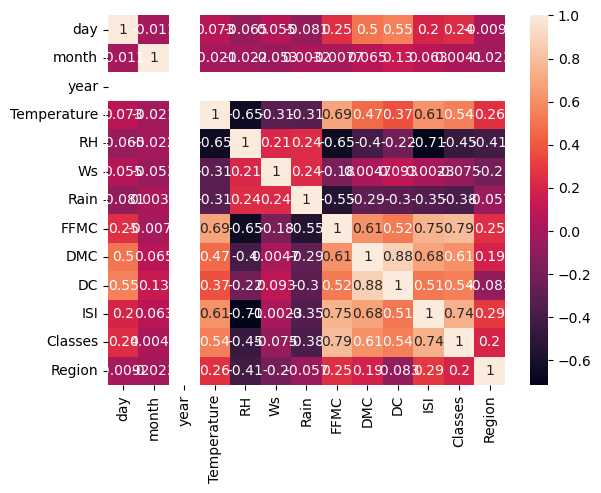

In [59]:
sns.heatmap(X_train.corr(), annot=True)
plt.show()


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
X_train_scaled.shape
X_test_scaled.shape


(49, 15)

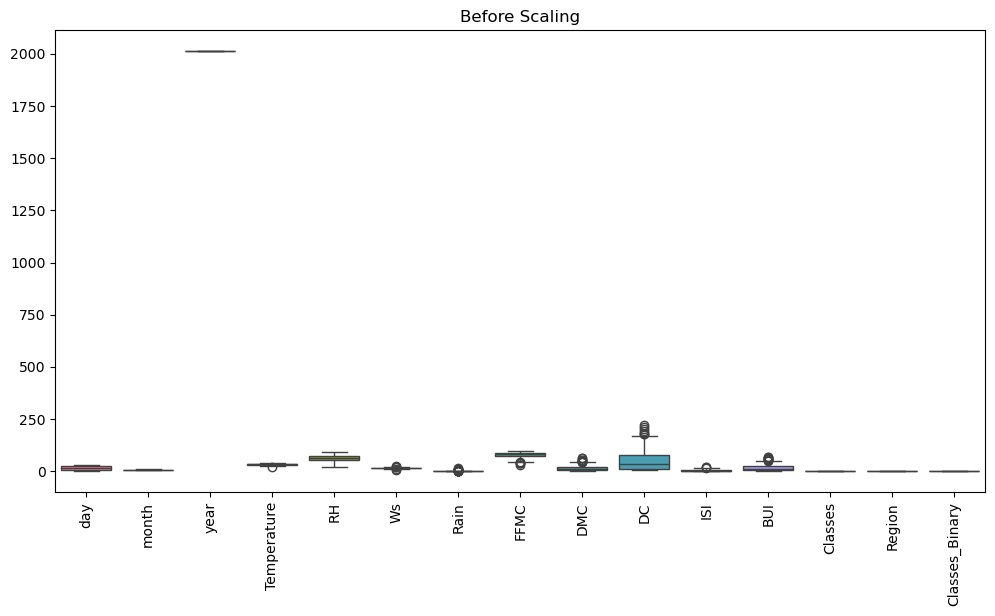

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title("Before Scaling")
plt.show()


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


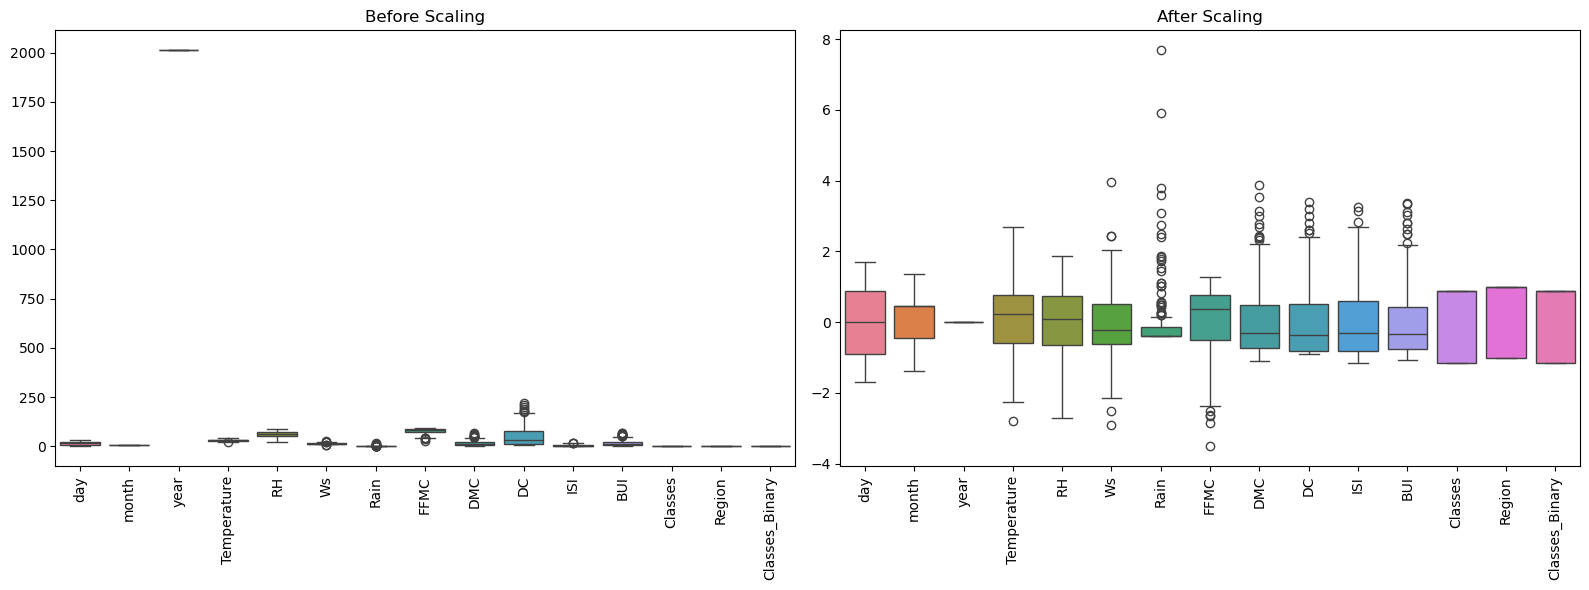

In [65]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Back to DataFrame for plotting
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

# ---- PLOTTING ----
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Before Scaling
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Before Scaling")
axes[0].tick_params(axis='x', rotation=90)

# After Scaling
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("After Scaling")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [66]:
# Target ke sath correlation
corr_target = df.corr()['FWI'].sort_values(ascending=False)
corr_target


FWI               1.000000
ISI               0.922895
DMC               0.875864
BUI               0.857973
DC                0.739521
Classes           0.719216
Classes_Binary    0.719216
FFMC              0.691132
Temperature       0.566670
day               0.350781
Region            0.197102
month             0.082639
Ws                0.032368
Rain             -0.324422
RH               -0.580957
year                   NaN
Name: FWI, dtype: float64

In [67]:
corr_matrix = X_train.corr().abs()


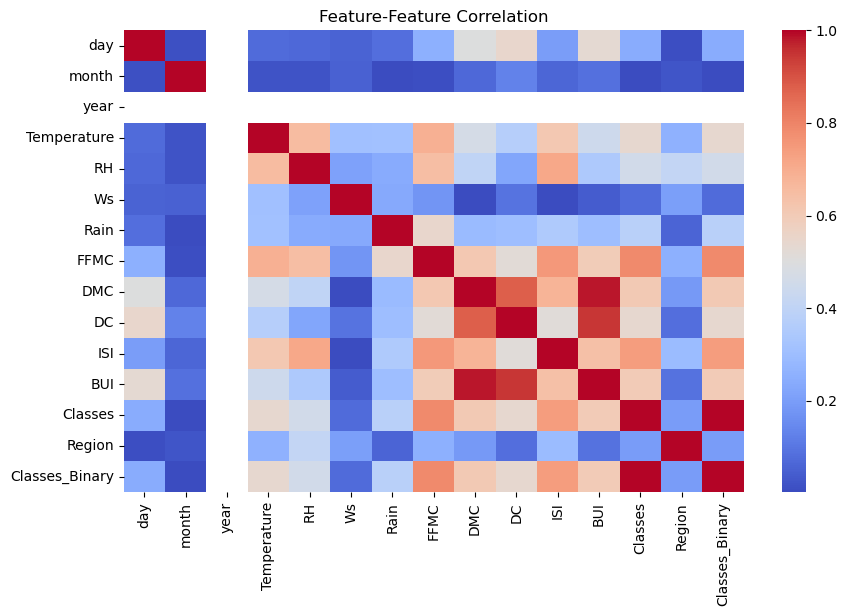

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Feature-Feature Correlation")
plt.show()


In [69]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_pairs = [
    (col, row)
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.9
]

high_corr_pairs


[('BUI', 'DMC'), ('BUI', 'DC'), ('Classes_Binary', 'Classes')]

In [70]:
# Feature-target
corr_target = df.corr()['FWI']

# Feature-feature
corr_matrix = df.corr().abs()

for f1 in corr_matrix.columns:
    for f2 in corr_matrix.columns:
        if f1 != f2 and corr_matrix.loc[f1, f2] > 0.9:
            print(f"{f1} & {f2} -> high corr ({corr_matrix.loc[f1,f2]:.2f})")


DMC & BUI -> high corr (0.98)
DC & BUI -> high corr (0.94)
ISI & FWI -> high corr (0.92)
BUI & DMC -> high corr (0.98)
BUI & DC -> high corr (0.94)
FWI & ISI -> high corr (0.92)
Classes & Classes_Binary -> high corr (1.00)
Classes_Binary & Classes -> high corr (1.00)


##### **Linerar Regression Model**

In [71]:
X_train_scaled

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region,Classes_Binary
0,0.915021,1.359661,0.0,-0.875632,0.213218,1.285770,-0.092069,-0.695683,-0.743420,-0.722758,-0.796488,-0.767910,-1.144344,-1.010363,-1.144344
1,1.140865,0.450095,0.0,0.222091,-1.654849,0.145041,-0.380156,1.001200,3.530889,2.329107,1.887575,3.100867,0.873863,0.989743,0.873863
2,-1.004660,-0.459471,0.0,1.594244,-1.254549,-0.995688,-0.140083,0.490005,-0.168916,-0.317182,-0.194888,-0.242767,0.873863,0.989743,0.873863
3,-0.552970,-1.369037,0.0,-0.326771,-1.321266,2.046257,-0.380156,0.887601,0.229407,-0.415564,1.956990,0.043071,0.873863,0.989743,0.873863
4,0.915021,0.450095,0.0,0.496522,0.146502,-0.615445,-0.380156,0.766902,1.937598,2.411427,0.938897,2.230060,0.873863,-1.010363,0.873863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-0.101281,1.359661,0.0,-2.247786,1.347402,-0.235202,-0.188098,-2.357067,-1.095782,-0.881375,-1.097289,-1.060395,-1.144344,-1.010363,-1.144344
190,-0.101281,-1.369037,0.0,-1.150063,1.213969,0.525284,1.108293,-2.037570,-0.934921,-0.879367,-1.051012,-0.954036,-1.144344,-1.010363,-1.144344
191,-1.682194,1.359661,0.0,-1.973355,0.947102,0.525284,3.076885,-2.278968,-1.065142,-0.877359,-1.097289,-1.033805,-1.144344,-1.010363,-1.144344
192,1.479632,-0.459471,0.0,0.496522,-0.187082,0.145041,-0.380156,0.710103,0.328987,-0.080260,0.568682,0.142782,0.873863,0.989743,0.873863
